In [22]:
import pandas as pd #pandas is a Python library for data frame
import os           # not required, this is only to check cwd
import numpy as np

In [23]:
# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns   # for visualization 
%matplotlib inline

In [24]:
os.getcwd()          # not required, this is only to check cwd
#os.listdir()

'/Users/swastika25'

In [55]:
# create a variable called train_data and store the training_v2.csv from the local machine to it

train_data = pd.read_csv("/Users/swastika25/Desktop/WiDS/widsdatathon2020/training_v2.csv")

In [26]:
train_data.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [56]:
y = train_data['hospital_death']  #store target variable in y
train_data.drop(labels=['hospital_death'], axis=1, inplace=True)

In [28]:
# y

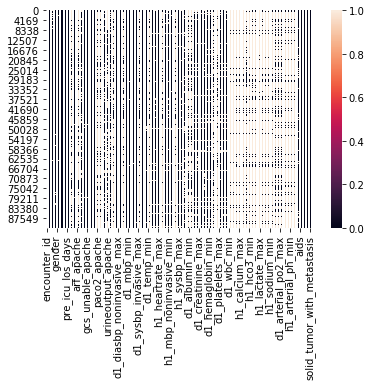

In [29]:
sns.heatmap(train_data.isnull()) #helps you visualize the null value, may not be as effective in a large # of cols

In [30]:
# count plot that shows the count of observations in each categorical data 
#https://seaborn.pydata.org/generated/seaborn.countplot.html 
#sns.countplot(x = 'hospital_death', data = train_data, color = 'Magenta') #provide target variable in x axis

In [31]:
#new_train_data.dropna(inplace=True)

In [32]:
#train_dummies = pd.get_dummies(train_data)

In [33]:
#train_dummies.head(10)

In [34]:
#train_dummies.columns

In [35]:
#make a list of columns from dataframe so that we can iterate over each column
cols_list = list(train_data.columns)
cols_list

['encounter_id',
 'patient_id',
 'hospital_id',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate

In [36]:
#cols_value = train_data.icu_type.value_counts()
#cols_value

In [57]:
to_drop = []    
to_add = []
cols_list = list(train_data.columns)
for col in cols_list:
    distinct_count = train_data[col].nunique()
    if 1 <= distinct_count <= 20:
        to_drop.append(col)
        prefix = str(col)
        new_cols =  pd.get_dummies(train_data[col], prefix=prefix, prefix_sep='_')
        to_add.append(new_cols)

In [38]:
to_add[0].shape

(91713, 74)

In [58]:
train_data.drop(labels = to_drop, axis =1, inplace =True)
to_add.append(train_data)
dummy_train_data = pd.concat(to_add, axis = 1)
dummy_train_data.head(10)

,elective_surgery_0,elective_surgery_1,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_F,gender_M,...,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,1,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05
1,1,0,0,0,1,0,0,0,1,0,...,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0.47,0.29
2,1,0,0,0,1,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
3,0,1,0,0,1,0,0,0,1,0,...,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,0.04,0.03
4,1,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.02
6,1,0,0,0,1,0,0,0,1,0,...,43.0,43.0,7.42,7.42,370.0,370.0,370.0,370.0,0.10,0.05
7,1,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11,0.06
8,1,0,0,0,1,0,0,0,0,1,...,60.0,60.0,7.14,7.14,92.0,92.0,92.0,92.0,NaN,NaN
9,1,0,0,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.01


In [59]:
dummy_train_data.interpolate(method='linear', axis=1, inplace=True)

In [41]:
from sklearn.model_selection import train_test_split     #Split arrays or matrices into random train and test subsets

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(dummy_train_data)

In [43]:
dummy_train_data.head()

,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,...,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.100000,2.766667,2.433333,2.100000,1.766667,1.433333,1.100000,0.766667,0.433333,0.10
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.000000,37.000000,37.000000,7.450000,7.450000,51.000000,51.000000,51.000000,51.000000,0.47
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5.004545,4.448485,3.892424,3.336364,2.780303,2.224242,1.668182,1.112121,0.556061,0.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,236.666667,36.000000,33.000000,7.370000,7.340000,337.000000,265.000000,337.000000,337.000000,0.04
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00


In [60]:
print(dummy_train_data.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(dummy_train_data, y, test_size=0.33, stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

(91713, 263) (91713,)


In [45]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(penalty='l1', 
                              class_weight={0: 0.1, 1:50.0}, 
                              n_jobs=-1,
                              max_iter=500, 
                              verbose=5, 
                              solver='saga',
                              C=100.0)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

max_iter reached after 1306 seconds


/Users/swastika25/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 21.8min finished


             precision    recall  f1-score   support

          0       0.99      0.01      0.01     27654
          1       0.09      1.00      0.16      2612

avg / total       0.92      0.09      0.02     30266



In [65]:
#n_Estimators means number of decsion trees
#hyper parameter tuning - read
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf = RandomForestClassifier(n_estimators = 500, 
                             max_depth = 10, 
                             n_jobs = -1,
                             class_weight = {0: 0.5, 1:3.5},
                             min_samples_split = 100
                            )
clf.fit(X_train, y_train)
rf_predictions = clf.predict(X_test)
print(classification_report(y_test,rf_predictions))

             precision    recall  f1-score   support

          0       0.96      0.91      0.93     27654
          1       0.39      0.63      0.49      2612

avg / total       0.91      0.88      0.90     30266

